In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import GridSearchCV

In [2]:
iris = load_iris()

In [39]:
knn = KNeighborsClassifier(n_neighbors= 6)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size= 0.2)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9666666666666667

In [41]:
tune = GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors': [2,3,4,5,6]
})
tune.fit(iris.data, iris.target)
tune.best_estimator_


KNeighborsClassifier(n_neighbors=6)

In [42]:
tune.best_score_

0.9800000000000001

In [43]:
digits = load_digits()

In [44]:
tune = GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors': [3,4,5,6]
})
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size= 0.2)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9916666666666667

In [46]:
tune.fit(X_train, y_train)
print(tune.score(X_test, y_test))
print(tune.best_params_, tune.best_score_)

0.9972222222222222
{'n_neighbors': 3} 0.9895663956639567


<Axes: >

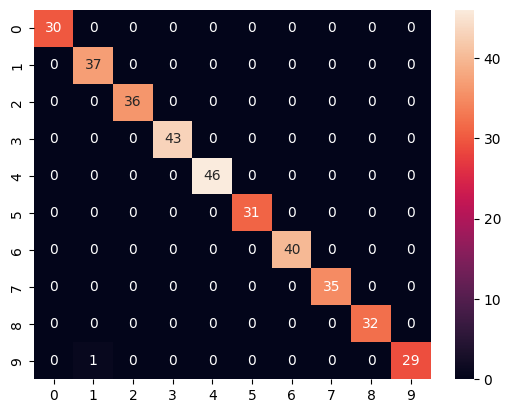

In [49]:
pred = tune.predict(X_test)
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)